In [85]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

column_names=["x","y","z"]
file_paths=glob.glob("dataset/*.txt")

dfs=[]

for file_path in file_paths:
    df = pd.read_csv(file_path, names=column_names)
    dfs.append(df)

X = pd.concat(dfs, ignore_index=True)


In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   z       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [87]:
X.head()


,x,y,z
0,1.103182,4.705777,0
1,-1.932846,3.642251,2
2,-2.034422,1.866002,2
3,1.616402,2.686831,0
4,-0.960010,4.492566,0


In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)
X = pd.DataFrame(normalized_data, columns=X.columns)


In [89]:
X.head()

,x,y,z
0,0.650956,0.809001,0.0
1,0.360491,0.699480,1.0
2,0.350773,0.516563,1.0
3,0.700057,0.601092,0.0
4,0.453565,0.787045,0.0


In [90]:

sample_indices = np.random.choice(X.shape[0], size=50, replace=False,)
X_sample = X.iloc[sample_indices]
print(X_sample.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 717 to 181
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
 2   z       50 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB
None


In [100]:
from sklearn.cluster import KMeans

def k_means(X,n_clusters):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    ax.scatter(X["x"], X["y"], X["z"],
            c=labels.astype(float), edgecolor="k")
    
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               c="RED", edgecolor="k", marker='*',s=500)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(f"{n_clusters} clusters")
    plt.show()


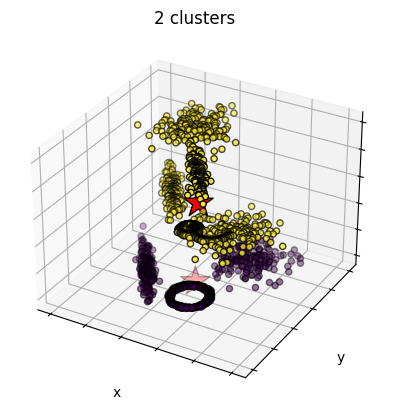

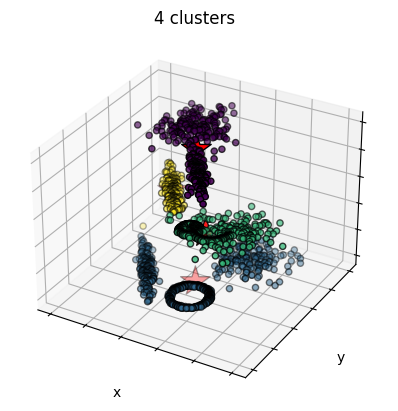

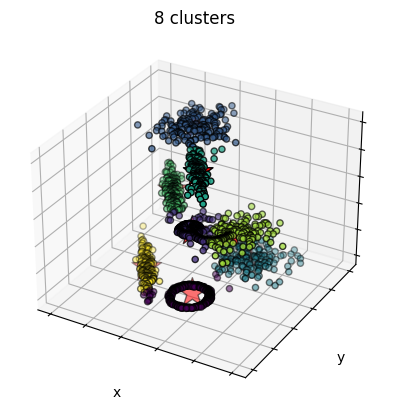

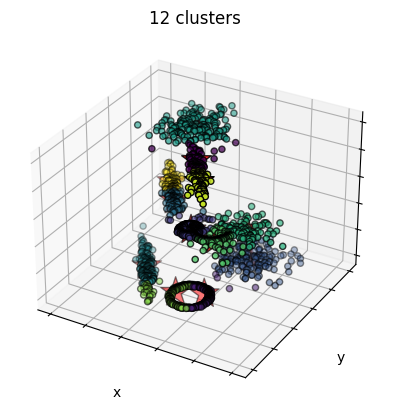

In [101]:
for n in [2,4,8,12]:
    k_means(X,n)



In [106]:
from sklearn.cluster import DBSCAN


def dbscan(X, eps, min_samples):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    dbscan_est = DBSCAN(eps=eps,min_samples=min_samples)
    dbscan_est.fit(X)
    labels = dbscan_est.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(f"Estimated number of clusters: {n_clusters_}")
    print(f"Estimated number of noise points: {n_noise_}")
    ax.scatter(X["x"], X["y"], X["z"],
               c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(f"DBSCAN eps:{eps}, min_samples:{min_samples}")
    plt.show()


<Figure size 640x480 with 0 Axes>

In [107]:
import itertools
for i,(eps,min_samples) in enumerate(list(itertools.product([0.1,0.2,0.4,0.7],[5,10,20,50]))):
    dbscan(X,i,eps,min_samples)

ValueError: Number of rows must be a positive integer, not 0